# Customer Churn Analysis And Prediction

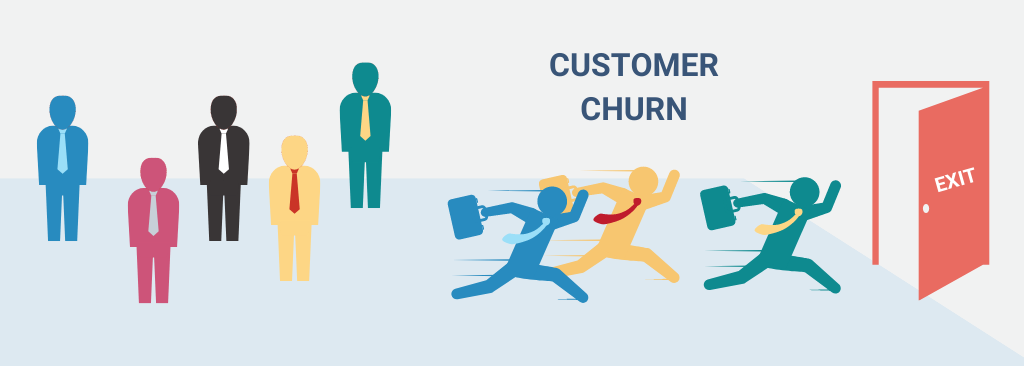

- In this analysis, we will utilize a dataset comprising customer data from a bank. Our objective is to perform exploratory analysis in order to gain insights into the primary factors influencing customer churn. 
- Additionally, we will develop a machine learning model to accurately predict customer churn.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

data = pd.read_csv(r"data\Customer-Churn-Records.csv")

In [3]:
%autosave 1

Autosaving every 1 seconds


In [4]:
%matplotlib inline

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [6]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
data.shape

(10000, 18)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [9]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [10]:
data.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

**No null Values**

In [11]:
data.Surname.nunique()

2932

In [12]:
data['Surname'].describe()

count     10000
unique     2932
top       Smith
freq         32
Name: Surname, dtype: object

Text(0.5, 1.0, 'Top 10 Surname (Exited)')

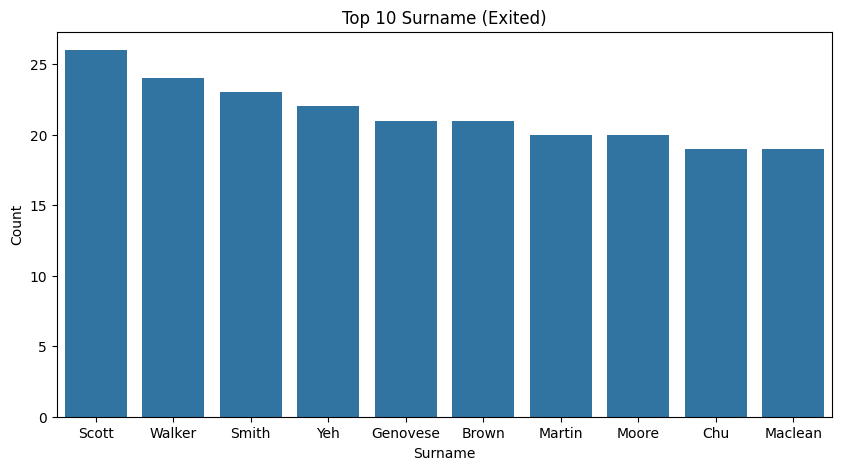

In [13]:
plt.figure(figsize = (10,5))
sur_exit = data.groupby(['Surname', 'Exited']).size().reset_index(name='Count')

sur_exit = sur_exit.sort_values(by='Count', ascending=False)
sur_exit = sur_exit.head(10)
sns.barplot(data=sur_exit, x='Surname', y='Count')
plt.title('Top 10 Surname (Exited)')

In [14]:
#Since RowNumber, CustomerId and Surname are irrelevant for further analysis as they wouldn't affect churn, we will drop these columns.

df = data.drop(columns={'RowNumber', 'CustomerId', 'Surname'}, axis=1)

In [15]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [16]:
df['Card Type'].unique()

array(['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM'], dtype=object)

In [17]:
df.duplicated().sum()

0

**No duplicate values**

In [18]:
print('Minimun Age:',df['Age'].min())
print('Maximum Age:',df['Age'].max())
print('Median Age:',df['Age'].median())

Minimun Age: 18
Maximum Age: 92
Median Age: 37.0


# Number of customers by Geography and Age Group:

In [19]:
#Number of customers by Geography and Age Group:

# Create age groups (e.g., 20-30, 31-40, etc.)
age_bins = [0, 20, 30, 40, 50, 60, 70]
age_labels = ['0-20', '20-30', '31-40', '41-50', '51-60', '61+']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Aggregate number of customers by geography and age group
No_of_customers_geo_age = df.groupby(['Geography', 'Age Group']).size().reset_index(name='Number of Customers')

# Sort the aggregated data by the number of customers in ascending order
No_of_customers_geo_age_sorted = No_of_customers_geo_age.sort_values(by='Number of Customers', ascending=False)

# Display the sorted aggregated data
#print(No_of_customers_geo_age_sorted)


C:\Users\shame\AppData\Local\Temp\ipykernel_8060\214707293.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  No_of_customers_geo_age = df.groupby(['Geography', 'Age Group']).size().reset_index(name='Number of Customers')


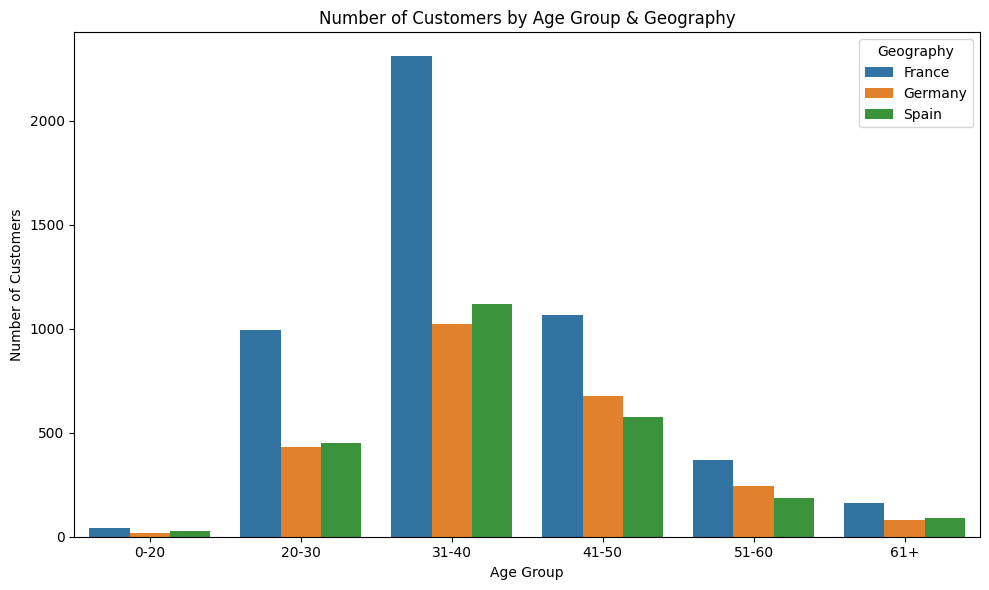

In [20]:
# Create the grouped bar chart
plt.figure(figsize=(10,6))
sns.barplot(data=No_of_customers_geo_age,x='Age Group', y='Number of Customers', hue='Geography',)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Age Group & Geography')

plt.tight_layout()
plt.show()

In [21]:
print('Minimum Salary:', df.EstimatedSalary.min())
print('Maximum Salary:', df.EstimatedSalary.max())
print('Median Salary:', df.EstimatedSalary.median())

Minimum Salary: 11.58
Maximum Salary: 199992.48
Median Salary: 100193.915


**Half of the customers have salary more than $ 100193.915.**

- Cause: This indicates that the bank has a significant portion of high-income customers, which could be attributed to targeted marketing strategies or the bank's positioning in the market.

# Number of customers by Salary Group and Exit Status:

In [22]:
salary_bins = [0,1000,10000,25000,50000,75000,100000,200000]

sal_labels = ['0-1K','1K-10K','10K-25K','25K-50K','50K-75K','75K-100K','100K+']
df['Salary Group'] = pd.cut(df['EstimatedSalary'], bins=salary_bins, labels=sal_labels)

# Aggregate number of customers by Salary Group and Exit Status
No_of_customers_Sal_Exited = df.groupby(['Salary Group', 'Exited']).size().reset_index(name='Number of Customers')

# Sort the aggregated data by the number of customers in ascending order
No_of_customers_Sal_Exited_sorted = No_of_customers_Sal_Exited.sort_values(by='Number of Customers', ascending=False)

C:\Users\shame\AppData\Local\Temp\ipykernel_8060\631980113.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  No_of_customers_Sal_Exited = df.groupby(['Salary Group', 'Exited']).size().reset_index(name='Number of Customers')


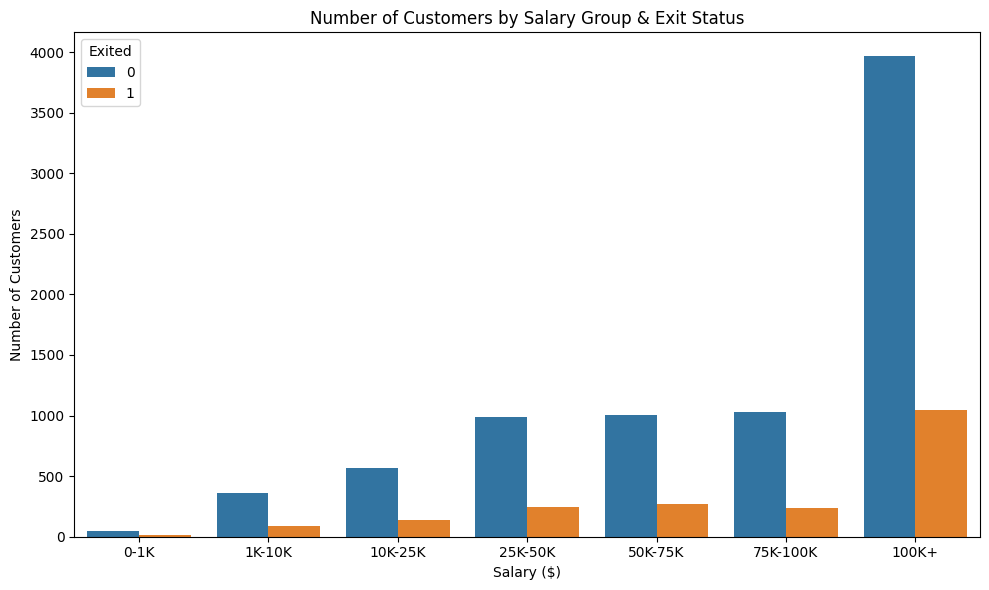

In [23]:
# Create the grouped bar chart
plt.figure(figsize=(10,6))
sns.barplot(data=No_of_customers_Sal_Exited_sorted ,x='Salary Group', y='Number of Customers', hue='Exited',)
plt.xlabel('Salary ($)')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Salary Group & Exit Status')

plt.tight_layout()
plt.show()

# 0 = didn't exit
# 1 = exited

**Chart shows that customers with higher salaries have a lower tendency to churn or leave the bank.**
- Cause:

1. Better Deals and Offers: The bank provides attractive deals and offers to customers with higher incomes, making them less likely to switch to another bank.

2. Financial Stability: Customers with higher salaries often have stronger financial stability and purchasing power, leading to a higher level of engagement with the bank.

3. Relationship Management: The bank often assigns dedicated relationship managers to high-income clients, providing personalized assistance and building strong connections that enhance trust and satisfaction.

[]

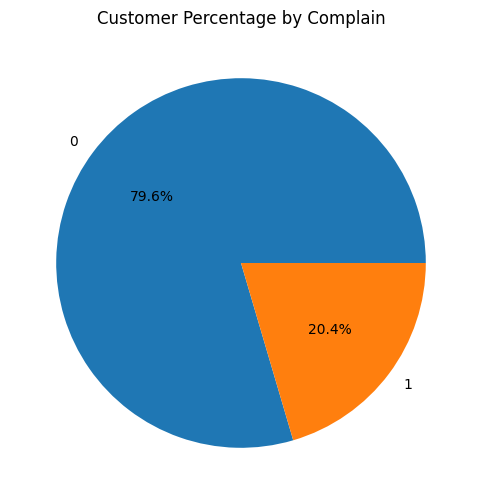

In [24]:
#Customer Percentage by Complain:

cmplt_cust = df.groupby(['Complain']).size()
plt.figure(figsize= (8,6))
plt.pie(cmplt_cust, labels = cmplt_cust.index,autopct='%1.1f%%')
plt.title('Customer Percentage by Complain')
plt.plot()

**20.4% customers are those who have active complaints or dissatisfied with the bank services.**

# Customers Count by Card Type and IsActiveMember:

In [25]:
#Customer Count by Card Type and IsActiveMember:

# Aggregate customer count by card type and active membership
customer_count_card_member = df.groupby(['Card Type', 'IsActiveMember']).size().reset_index(name='Number of Customers')

# Display the aggregated data
#print(customer_count_card_member)

<Axes: xlabel='Card Type', ylabel='Number of Customers'>

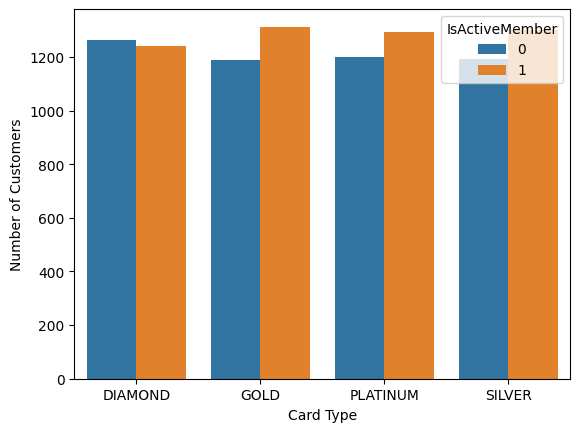

In [26]:
sns.barplot(data= customer_count_card_member, x= 'Card Type', y = 'Number of Customers', hue= 'IsActiveMember')

# Distribution of Age:

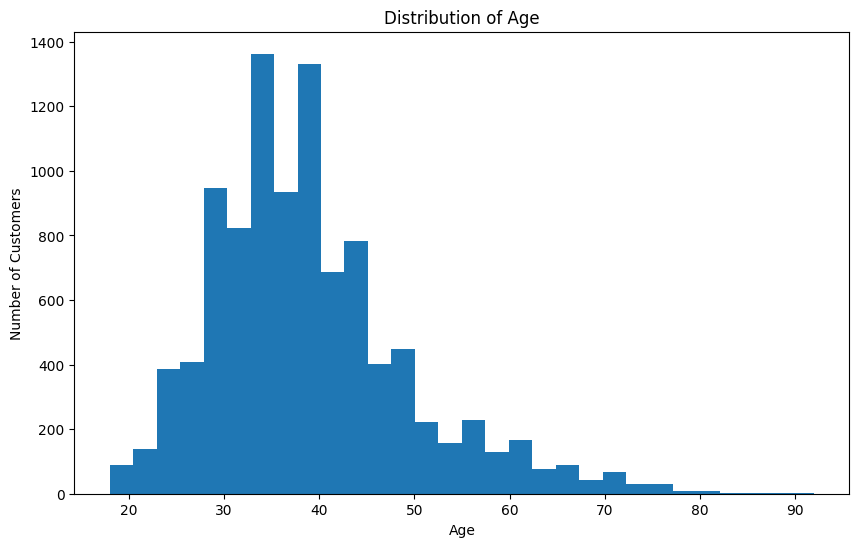

In [27]:
# Plot a histogram of the 'Age' feature

plt.figure(figsize =(10,6))
plt.hist(df['Age'], bins=30)
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Distribution of Age')
plt.show()

**Customers between age 26-45 are the most**
- Cause: This age group represents the working population and individuals who are likely to have banking needs such as loans, mortgages, and investments.

# Distribution of Gender:

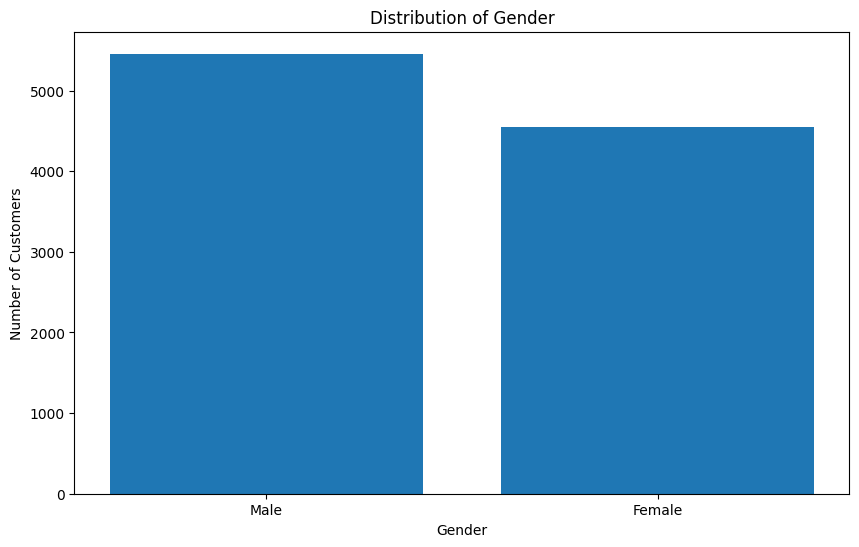

In [28]:
# Plot a bar chart of the 'Gender' feature
plt.figure(figsize =(10,6))
gender_counts = df['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Distribution of Gender')
plt.show()

**Not a very big differnce in gender distribution of customers.**
- Cause: This shows that the bank targeted both the genders equally in its marketing.

# Distribution of Card Type:

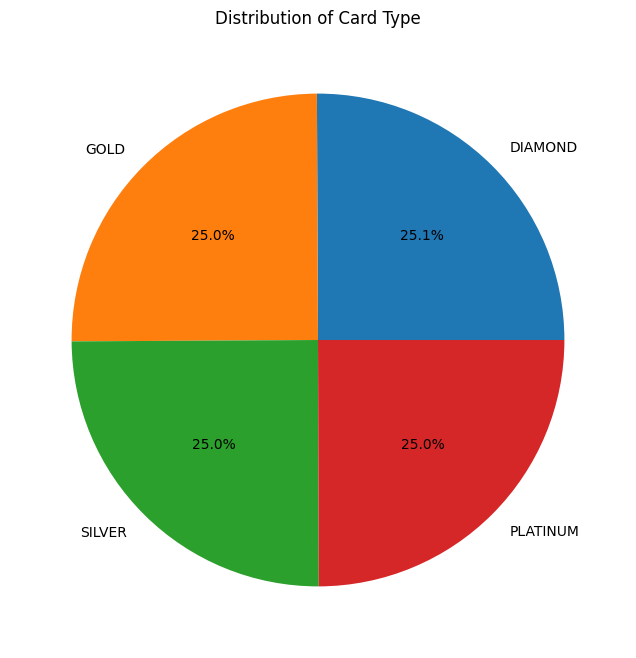

In [29]:
# Plot a pie chart of the 'Card Type' feature

plt.figure(figsize =(12,8))

card_type_counts = df['Card Type'].value_counts()
plt.pie(card_type_counts, labels=card_type_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Card Type')
plt.show()


**Almost all the card types have equal share of customers.**
  - Cause: The distribution of card types suggests that customers have diverse preferences, and the bank has effectively marketed and provided options for different card types to cater to customer needs.


In [30]:
df[df['Gender']=='Female']['Age'].value_counts()

Age
35    209
39    208
40    205
37    200
38    200
     ... 
81      2
82      1
80      1
85      1
84      1
Name: count, Length: 67, dtype: int64

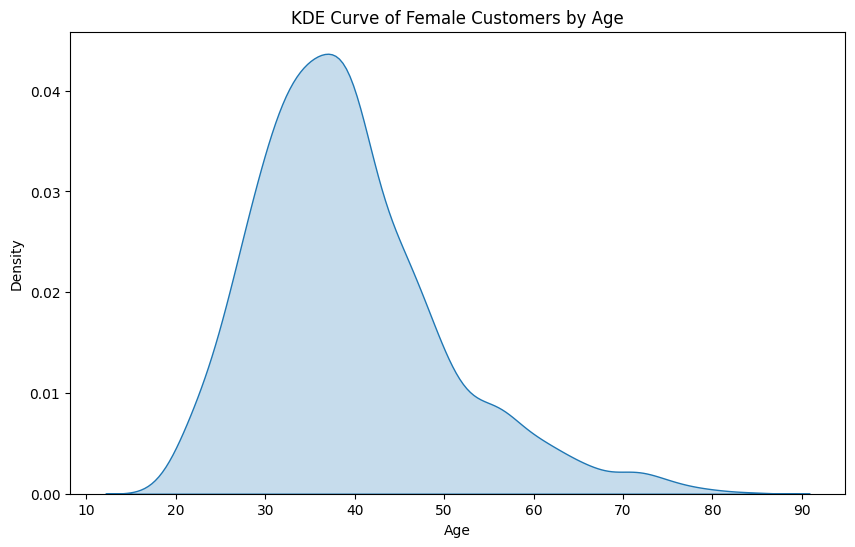

In [31]:
#To plot KDE Curve of Female Customers by Age

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['Gender'] == 'Female'], x='Age', fill=True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('KDE Curve of Female Customers by Age')
plt.show()


**Amongst female customers, there is higher density of age between 25-45.**

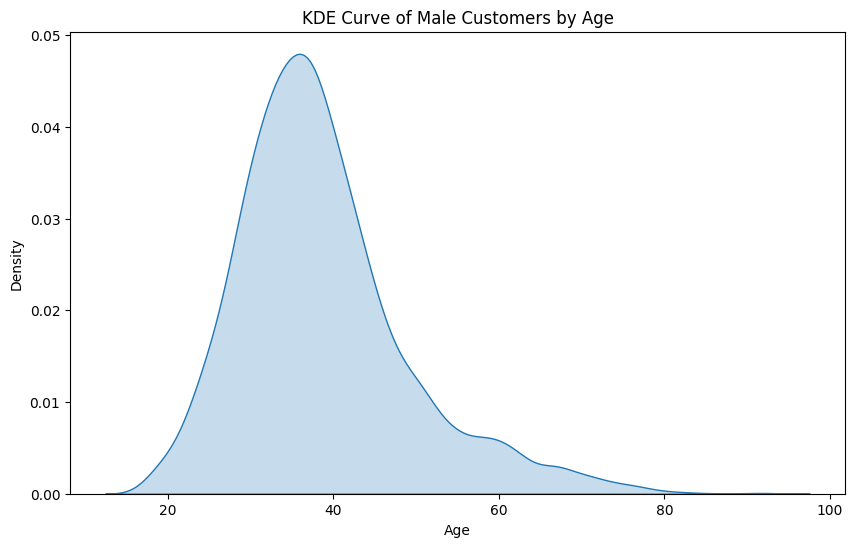

In [32]:
#To plot KDE Curve of Male Customers by Age

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['Gender'] == 'Male'], x='Age', fill=True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('KDE Curve of Male Customers by Age')
plt.show()


**Amongst male customers too, there is higher density of age between 25-45.**

**Suggestion to the bank:** By knowing the density of customers by gender and age, bank can effectively target the customers according to their age and gender.

# Correlation Matrix:

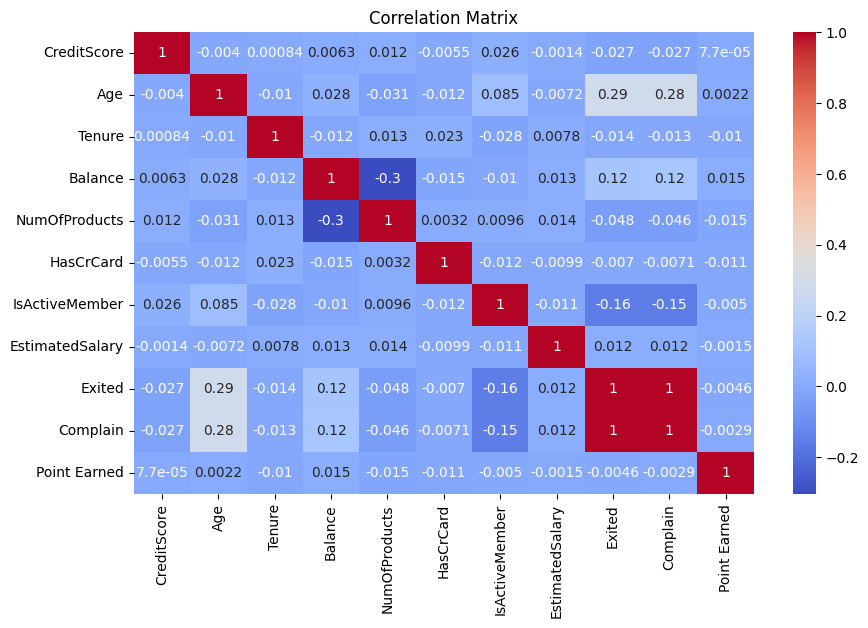

In [33]:
# Select only the numerical features for correlation matrix
numerical_features = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts','HasCrCard','IsActiveMember', 'EstimatedSalary', 'Exited','Complain','Point Earned']]

# Compute the correlation matrix
corr_matrix = numerical_features.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize =(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Not a very good correlations between features**
  - Finding: The correlation analysis reveals that there is no strong linear relationship between the features examined.
   - Cause: The absence of strong correlations suggests that customer churn may be influenced by a combination of multiple factors rather than a single dominant factor.

# Churn Rate by Geography:

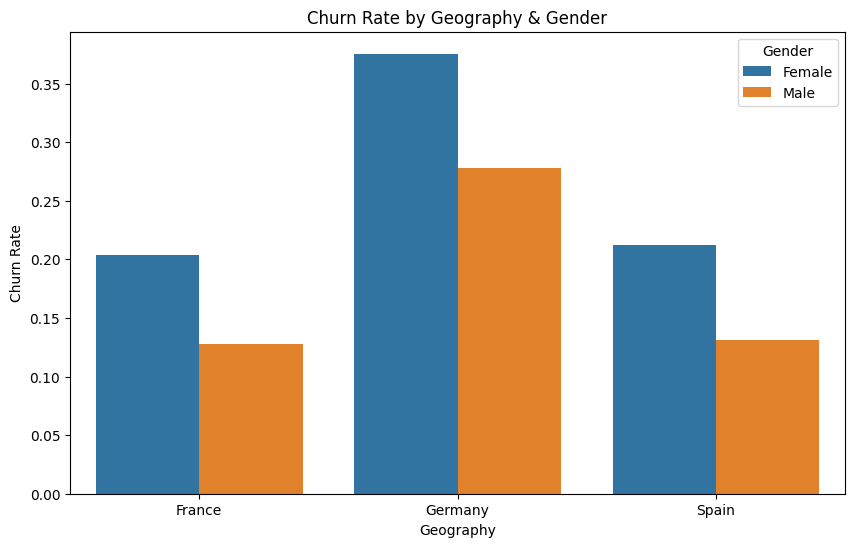

In [34]:
# Plot the churn rate by 'Geography' and 'Gender'
plt.figure(figsize =(10,6))

churn_rate_geo_gender = df.groupby(['Geography','Gender'])['Exited'].mean().reset_index(name="Churn Rate")
sns.barplot(data=churn_rate_geo_gender, x= 'Geography', y= 'Churn Rate', hue='Gender')
plt.xlabel('Geography')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Geography & Gender')
plt.show()

**Germany has highest chuned customers. And among the gender, females are churning out more.**
 - Cause: It could be due to various reasons such as customer dissatisfaction, competitive offers from other banks, or specific market conditions in Germany.

In [35]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Age Group,Salary Group
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,41-50,100K+
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,41-50,100K+


# Churn Rate by Complain Status and Is Active Member or Not:

Text(0.5, 1.0, 'Churn Rate by Complain & IsActiveMember')

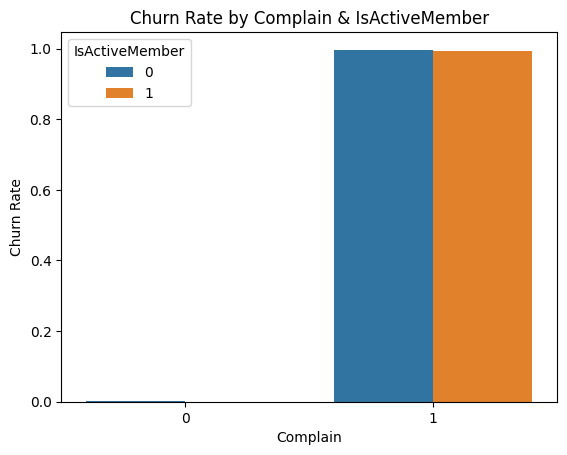

In [36]:
churn_rate_complain = df.groupby(['Complain','IsActiveMember'])['Exited'].mean().reset_index()
sns.barplot(x='Complain', y='Exited', data=churn_rate_complain,hue='IsActiveMember')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Complain & IsActiveMember')

**A. Customers with active complaints have a higher churn rate. Customers without any complaints have almost negligible churn rate.**

- Cause: Active complaints could indicate dissatisfaction with the bank's services, unresolved issues, or a negative customer experience. Customers who have complaints and feel unheard or unsatisfied with the bank's response are more likely to churn.

**B. Churning of customers is not affected by whether they are active members or not.**

- Cause: While being an active member may have benefits and engagement opportunities, it may not be the sole factor influencing customer churn. Other aspects such as service quality, satisfaction, and personalized offerings may play a more significant role.

# Churn Rate by Age and Gender:

In [37]:
import plotly.express as px

# Calculate churn rate by age and gender
churn_rate_age_gender = df.groupby(['Age', 'Gender'])['Exited'].mean().reset_index()

# Create an interactive scatter plot
fig = px.scatter(data_frame=churn_rate_age_gender, x='Age', y='Exited', color='Gender',
                 title='Churn Rate by Age & Gender')
fig.update_layout(xaxis_title='Age', yaxis_title='Churn Rate')
fig.show()


**From the scatter plot, it can be seen that**

1. Customers of age between 45 - 70 have higher tendency to leave the bank.
2. Female has higher churn rate than male.

  - Cause: 
  1. Older customers may be more likely to consider switching banks due to life changes, retirement, or seeking better financial products and services.
  2. The higher churn rate among female customers could be influenced by various factors such as customer satisfaction, service quality, targeted marketing strategies,etc.

# Churn Rate by Tenure & HasCrCard:

In [38]:
# Aggregate churn rate by tenure and credit card status
churn_rate_tenure_card = data.groupby(['Tenure', 'HasCrCard'])['Exited'].mean().reset_index(name='Churn Rate')

# Display the aggregated data
#print(churn_rate_tenure_card)

In [39]:
# Create an interactive scatter plot
fig = px.scatter(churn_rate_tenure_card, x='Tenure', y='Churn Rate', color='HasCrCard',
                 title='Churn Rate by Tenure & Has CreduCard')
fig.update_layout(xaxis_title='Tenure', yaxis_title='Churn Rate')
fig.show()


# Churn Rate by Geography and Tenure:

In [40]:
#Churn Rate by Tenure and HasCrCard:

# Aggregate churn rate by tenure and credit card status
churn_rate_tenure_card = data.groupby(['Tenure', 'HasCrCard'])['Exited'].mean().reset_index(name='Churn Rate')

# Display the aggregated data
#print(churn_rate_tenure_card)


In [41]:
# Calculate churn rate by geography and tenure
churn_rate_geo_tenure = df.groupby(['Geography', 'Tenure'])['Exited'].mean().reset_index()

# Create an interactive bar chart
fig = px.bar(churn_rate_geo_tenure, x='Geography', y='Exited', color='Tenure',
             title='Churn Rate by Geography & Tenure')
fig.update_layout(xaxis_title='Geography', yaxis_title='Churn Rate')
fig.show()


**As you can see, old customers are the one who are leaving the bank most.**
  - Cause: Older customers (Customers with high tenure period with the bank) may be more aware of their banking needs and have higher expectations regarding customer service, financial advice, and personalized offerings. If these expectations are not met, they may choose to switch banks.

# Churn Rate by Credit Score and NumOfProducts:

In [42]:
# Calculate churn rate by credit score and number of products
churn_rate_credit_products = df.groupby(['CreditScore', 'NumOfProducts'])['Exited'].mean().reset_index()

# Create an interactive heatmap
fig = px.density_heatmap(churn_rate_credit_products, x='CreditScore', y='NumOfProducts',
                         z='Exited', title='Churn Rate by Credit Score & No. Of Products')
fig.update_layout(xaxis_title='Credit Score', yaxis_title='Number Of Products')
fig.show()


**From the heatmap, it is clear that customers with 3 Num. of Products and a credit score between 550 - 700 are the most amongst the churned customers.** 
 - Cause: Customers with multiple products and a moderate credit score may be more sensitive to changes in service quality, pricing, or other competitive factors. They may also be targeted by competitors offering attractive incentives to switch banks.

# Building ML Predictive Model

In [43]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Age Group,Salary Group
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,41-50,100K+
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,41-50,100K+
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,41-50,100K+
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,31-40,75K-100K
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,41-50,75K-100K


In [44]:
"""Drop categorical columns, we can do one-hot encoding but because we will be taking only single row data
from the users, one-hot encoding does not work properly in that case."""

df  = df.drop(["Geography","Age Group","Gender","Salary Group","Card Type"], axis =1)

In [45]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377
3,699,39,1,0.00,2,0,0,93826.63,0,0,5,350
4,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425


In [46]:
df.shape

(10000, 12)

In [47]:
# Handle Missing Values if any
df.ffill(inplace=True)

In [48]:
# Step 2: Feature Engineering

# Feature Selection
selected_features = df.drop(['Exited'], axis=1)
target_variable = df['Exited']


In [49]:
# Step 3: Model Selection and Training

# Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(selected_features, target_variable, test_size=0.2, random_state=42)

# Train and Evaluate Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)


In [50]:
# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)
# Calculate Precision
precision = precision_score(y_test, rf_predictions)
# Calculate Recall
recall = recall_score(y_test, rf_predictions)
# Calculate F1-score
f1 = f1_score(y_test, rf_predictions)

# Print the results

print("Accuracy score:",rf_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy score: 0.999
Precision: 0.9974554707379135
Recall: 0.9974554707379135
F1-score: 0.9974554707379135


In [52]:
import pickle

# Specify the file path where you want to save the model
model_file_path = r"C:\Users\shame\Desktop\bank\model"

# Save the model to a file
with open(model_file_path, 'wb') as file:
    pickle.dump(rf_model, file)

print(f'Model saved to {model_file_path}')


Model saved to C:\Users\shame\Desktop\bank\model


# To deploy the model for a new data,following steps can be followed-

1. Read new data:   new_data = pd.read_csv('new_data.csv')
2. Preprocess the new data
3. Apply feature engineering
4. Scale the features
5. Use the final_model.predict() function to make predictions



# Recommendations for the Bank:


1. **Improve Customer Satisfaction:** Conduct regular customer satisfaction surveys to identify pain points and areas for improvement. Addressing customer concerns promptly and effectively can help reduce churn rates.


2. **Enhance Customer Retention Programs:** Develop loyalty programs, personalized offers, and rewards to incentivize customers to stay with the bank. Building strong relationships and providing value-added services can increase customer loyalty.


3. **Focus on Retaining Female Customers:** Analyze the reasons behind the higher churn rate among female customers. Tailor marketing and customer service strategies to meet their specific needs and preferences.


4. **Strengthen Communication Channels:** Ensure effective communication channels are in place to keep customers informed about new products, services, and updates. Regularly engage with customers through personalized interactions and provide timely support.


5. **Offer Targeted Financial Solutions:** Analyze the needs and preferences of customers within the age group of 45-70. Provide tailored financial solutions, such as retirement planning, investment options, and specialized services, to meet their unique requirements.


6. **Targeted Marketing:** Leverage the insights about customer segments with higher salaries to tailor marketing strategies and offerings specifically for this group. This can strengthen relationships, increase loyalty, and reduce the likelihood of customer churn.


7. **Provide Value-added Products and Services:** Continuously assess the market to identify emerging trends and offer innovative products and services that differentiate the bank from competitors. Regularly review and update existing offerings to remain competitive.


8. **Foster Trust and Transparency:** Build trust and transparency through clear communication, fair pricing, and reliable services. Ensure customers feel valued and have confidence in the bank's integrity and commitment to their financial well-being.


9. **Complaint Resolution:** Improve the complaint resolution process by actively addressing customer complaints, providing prompt and satisfactory solutions, and enhancing customer support channels. This can help reduce churn rates associated with unresolved complaints.


10. **Focus on Customer Education:** Offer financial literacy programs and educational resources to empower customers to make informed decisions. Educated customers are more likely to remain loyal and satisfied with the bank's services.



- By implementing these recommendations, the bank can strengthen customer relationships, increase customer satisfaction, and ultimately reduce churn rates. Regular monitoring and analysis of customer behavior and feedback will help refine strategies and further improve customer retention efforts.

# If you enjoyed it, please remember to upvote.

# Thanks!